In [352]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### Reading the Training and Test dataset.

In [353]:
df_train = pd.read_excel('Data_Train.xlsx')
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [354]:
df_test = pd.read_excel('Test_set.xlsx')
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


### Doing some preliminary Exploratory Data Analysis or EDA.

In [355]:
df_train.count()

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10682
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10682
Additional_Info    10683
Price              10683
dtype: int64

#### <i>Insight: There in 1 missing value in the 'Route' and 'Total_Stops' features.</i>

In [356]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [357]:
# To view the statistical description of 'all' features
df_train.describe(include = 'all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [358]:
# Viewwing the data type of the features in our dataset
df_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

#### <i>Insight: All features excpet 'Price' (which is of integer datatype) are categorical.</i>

In [359]:
# Hunting missing values
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [360]:
# viewing how many 'total' null values are there in the dataset
df_train.isnull().sum().sum()

2

In [361]:
# Fetching those row(s) where there is/are missing values
df_train[df_train['Route'].isna() | df_train['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


#### <i>Insight: The row at index 9039 contains a missing value in the Route and Total_Stops feature.</i><br><br>

#### <b>You will have to choose what must be done here with the missing values - Omit them OR Impute them?</b><br>
#### <i>Since, we only have one missing value, getting rid of them seems harmless and the right thing to do, not to mention it's just easier.</i>

In [362]:
df_train.dropna(inplace = True)

In [363]:
df_train.isnull().sum().sum()

0

In [364]:
df_train.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


## Price

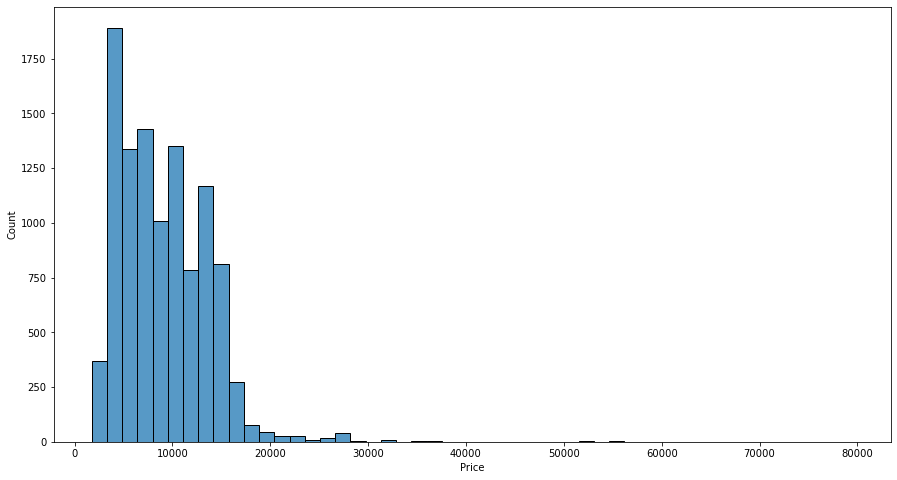

In [365]:
# Plotting a histogram to view how the 'Price' feature is laid out.

plt.figure(figsize = (15, 8))
sns.histplot(data = df_train, x = "Price", bins = 50)
plt.show()

## Date of Journey

In [366]:
df_train['Date_of_Journey'].dtype

dtype('O')

#### As you can see, the data type of Date_of_Journey is 'O' or Object. It means it is not considered as an integer.<br>
#### This arrangment is not suitable for the purpose of model building.<br>
#### A better intuition would be to separate the date, month, and the year. This is what is done in the following cells.

In [367]:
df_train['Date'] = df_train['Date_of_Journey'].str.split('/').str[0]
df_train['Month'] = df_train['Date_of_Journey'].str.split('/').str[1]
df_train['Year'] = df_train['Date_of_Journey'].str.split('/').str[2]

In [368]:
# Now convert them into int type
df_train['Date'] = df_train['Date'].astype(int)
df_train['Month'] = df_train['Month'].astype(int)
df_train['Year'] = df_train['Year'].astype(int)
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


## Duration

In [369]:
df_train['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

#### As evident by the output above, the Duration is shown in a string format.<br>
#### So, they must be converted to an integer format so that they could be used for calculations

In [370]:
# converting duration into minutes
def convert_duration(duration):
    if len(duration.split()) == 2:
        hours = int(duration.split()[0][:-1])
        minutes = int(duration.split()[1][:-1])
        return hours * 60 + minutes
    else:
        return int(duration[:-1]) * 60

In [371]:
df_train["Duration"] = df_train["Duration"].apply(convert_duration)

In [372]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,150,non-stop,No info,4107,9,4,2019
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,155,non-stop,No info,4145,27,4,2019
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,180,non-stop,No info,7229,27,4,2019
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,160,non-stop,No info,12648,1,3,2019


In [373]:
'''
In case you're wondering how a split function works, this is an illustration.
split() will split the string based on a delimiter.
By default, the space character is the delimiter if none is provided.'''

x = '2h 50m'
x.split()

['2h', '50m']

In [374]:
x.split()[1][:-1]

'50'

## Total_Stops<br>
#### The following cells show how the 'non-stop' output is replaced by 0 in the Total_Stops, and<br>the rest of the values would be filled in by the number of stops.

In [375]:
# formatting the stops
df_train["Stops"] = df_train["Total_Stops"].str.split(" ").str[0]
df_train["Stops"].replace("non-stop" , 0 , inplace = True)

In [376]:
# Converting the stops dtype to int
df_train['Stops'] = df_train["Stops"].astype(int)

In [377]:
df_train['Stops'].dtypes

dtype('int64')

In [378]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Stops
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3,2019,0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,1,5,2019,2
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,9,6,2019,2
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,12,5,2019,1
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,1,3,2019,1


In [379]:
df_train['Year'].unique()

array([2019])

In [380]:
# Now that the basic cleaning is done, we can get rid of 'uncleaned' features
# We also want to get rid of 'Year' because it is the same for all data points

# For the sake of simplicity, we may want to drop a few features which may have too many
# categorical features - Route, Dep_Time, Arrival_Time

df_train.drop(['Date_of_Journey', 'Total_Stops', 'Year', 'Route', 'Dep_Time', 'Arrival_Time'], axis = 1, inplace = True)
df_train.head()

,Airline,Source,Destination,Duration,Additional_Info,Price,Date,Month,Stops
0,IndiGo,Banglore,New Delhi,170,No info,3897,24,3,0
1,Air India,Kolkata,Banglore,445,No info,7662,1,5,2
2,Jet Airways,Delhi,Cochin,1140,No info,13882,9,6,2
3,IndiGo,Kolkata,Banglore,325,No info,6218,12,5,1
4,IndiGo,Banglore,New Delhi,285,No info,13302,1,3,1


In [381]:
# Viewing all the Categorical columns
cat = df_train.select_dtypes(include = 'object').columns.to_list()
cat

['Airline', 'Source', 'Destination', 'Additional_Info']

In [382]:
# Viewing all the Integer columns
ints = df_train.select_dtypes(exclude = 'object').columns.to_list()
ints

['Duration', 'Price', 'Date', 'Month', 'Stops']

# Data Visualization

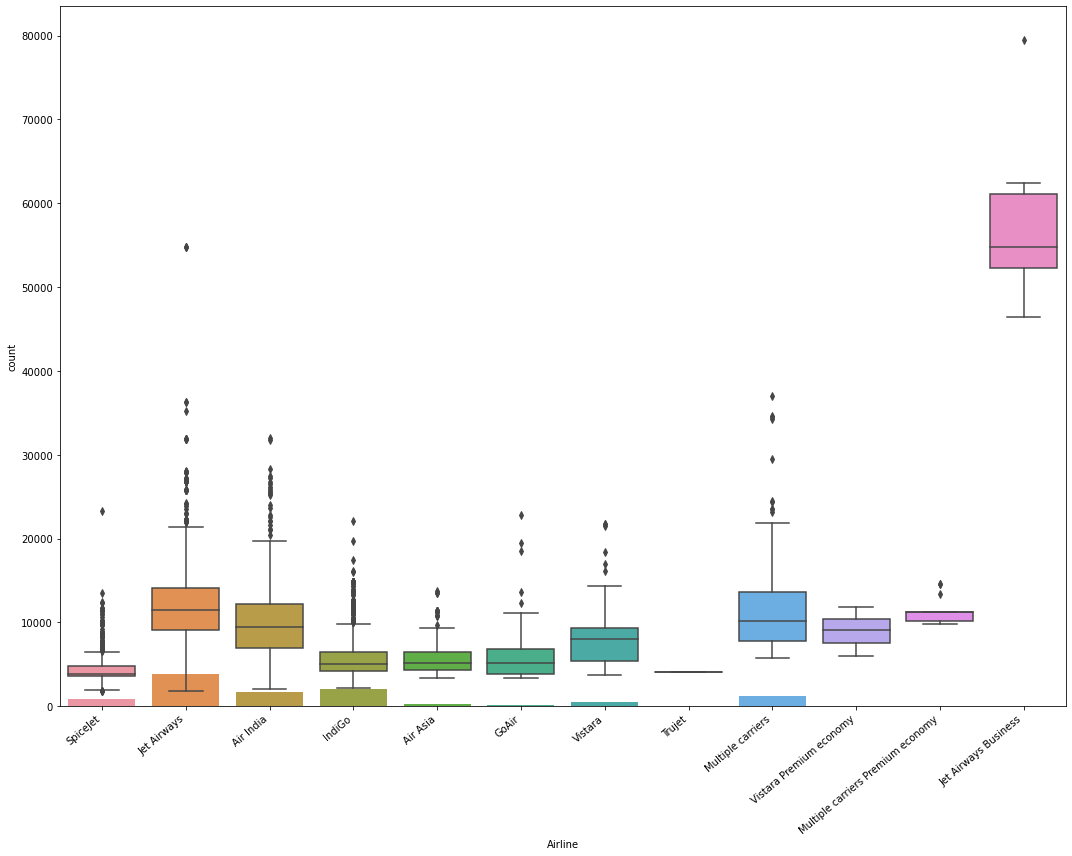

In [383]:
plt.figure(figsize = (15, 12))
sns.boxplot(x = 'Airline', y = 'Price', data = df_train.sort_values('Price', ascending = True))

ax = sns.countplot(x = "Airline", data = df_train.sort_values('Price', ascending = True))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Stops', ylabel='Price'>

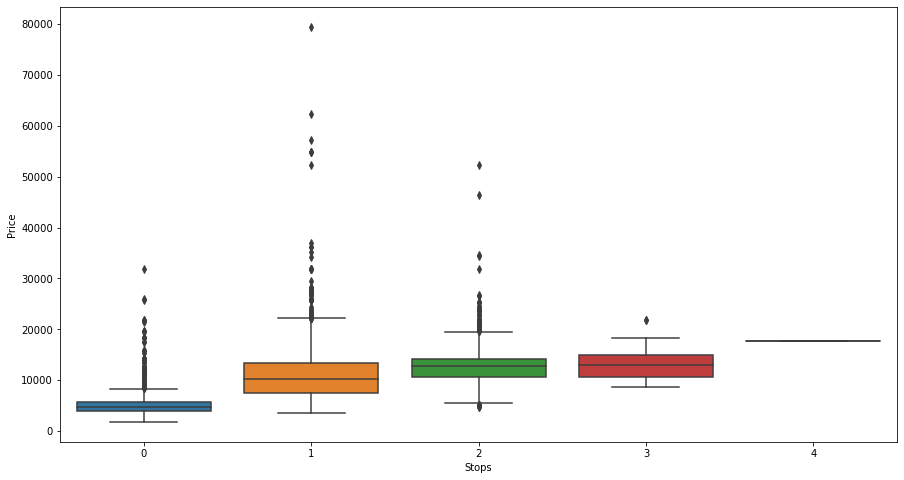

In [384]:
plt.figure(figsize=(15,8))
sns.boxplot(x = "Stops", y = "Price", data = df_train.sort_values("Price", ascending = False))

<AxesSubplot:xlabel='Source', ylabel='Price'>

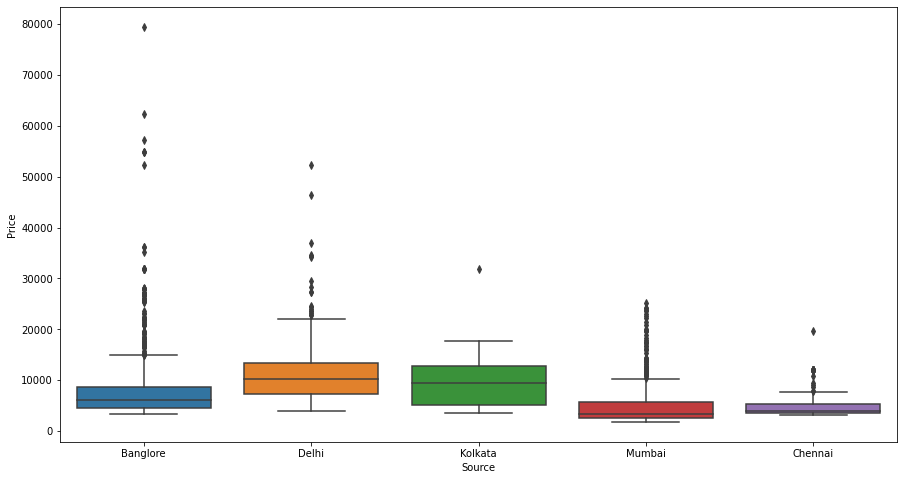

In [385]:
plt.figure(figsize=(15,8))
sns.boxplot(x = "Source", y = "Price", data = df_train.sort_values("Price", ascending = False))

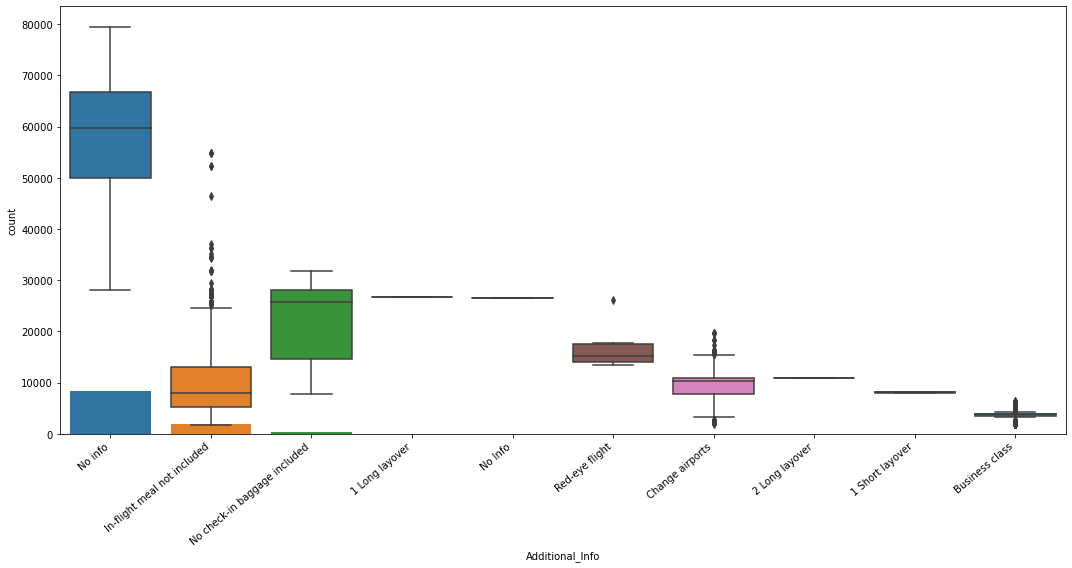

In [386]:
plt.figure(figsize=(15,8))
sns.boxplot(x = "Additional_Info", y = "Price", data = df_train.sort_values("Price", ascending = False))

ax = sns.countplot(x = "Additional_Info", data = df_train.sort_values('Price', ascending = True))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Duration', ylabel='Count'>

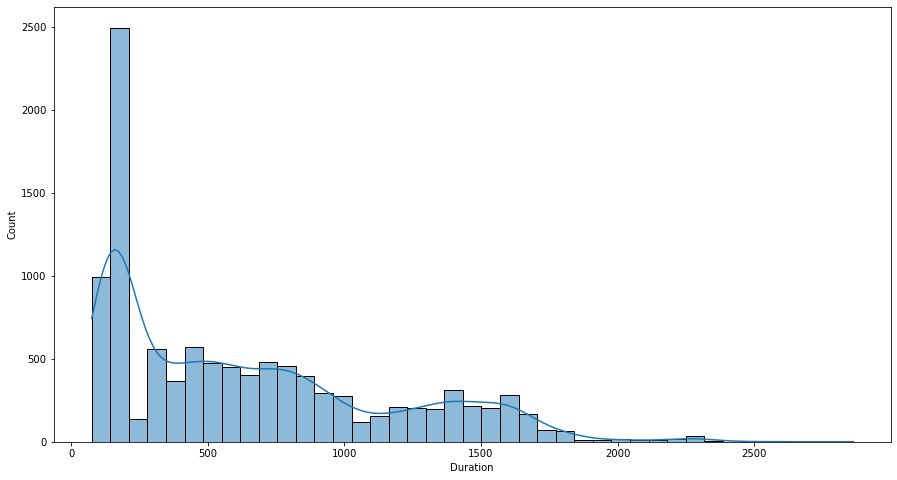

In [387]:
plt.figure(figsize = (15 , 8))
sns.histplot(data = df_train , x = "Duration" , kde = True)

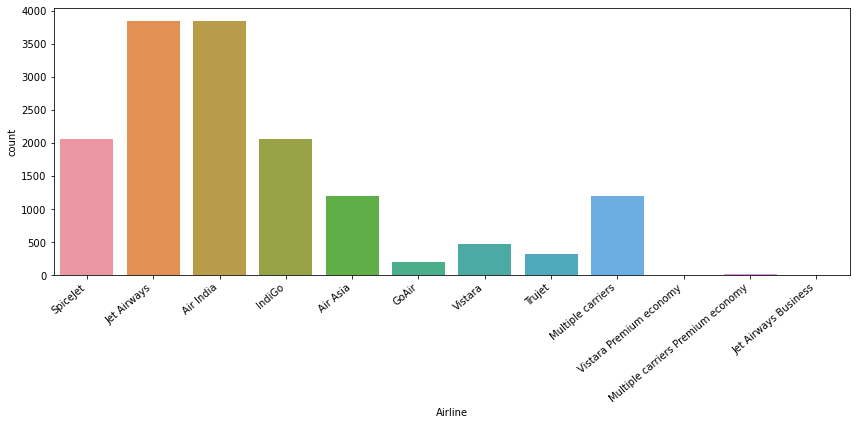

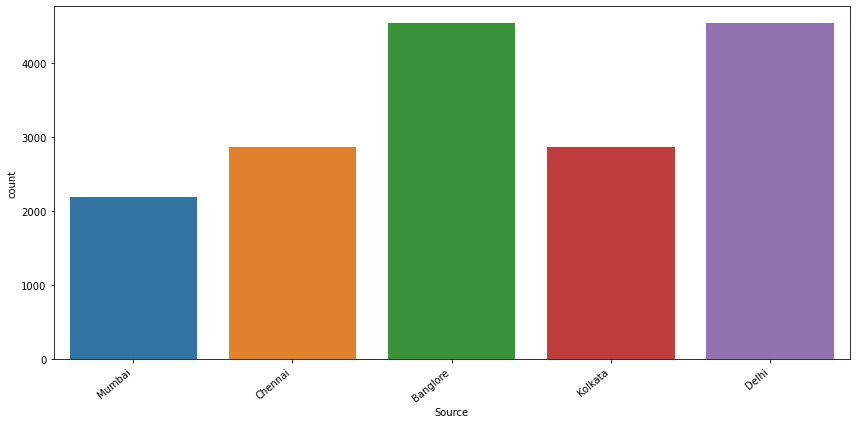

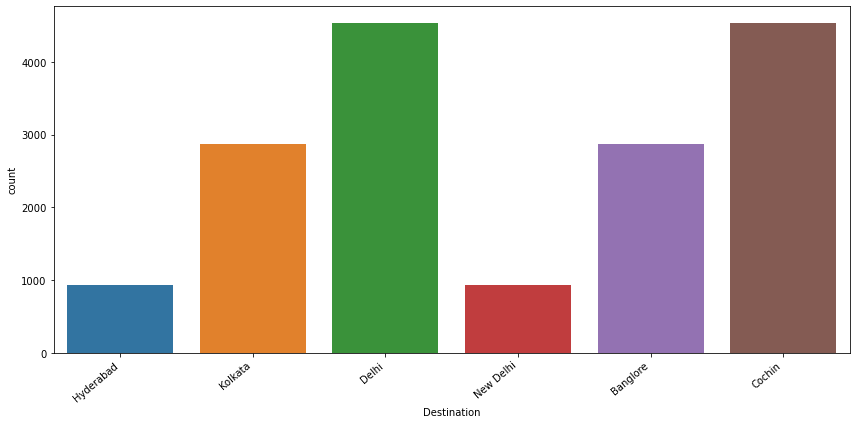

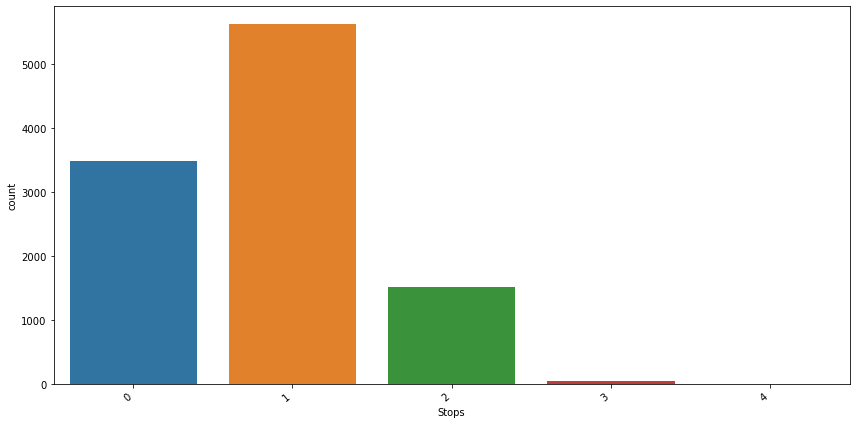

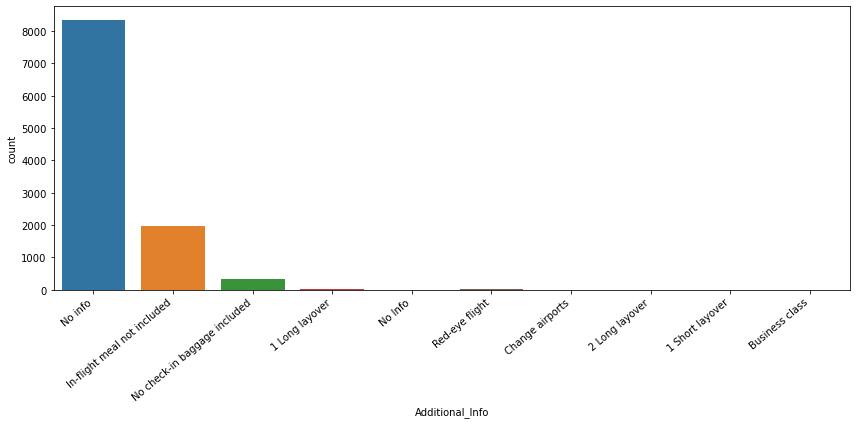

In [388]:
for i in ["Airline" , "Source" , "Destination" , "Stops" , "Additional_Info"]:
    plt.figure(figsize = (12 , 6))
    sns.countplot(data = df_train , x = i)
    
    ax = sns.countplot(x = i, data = df_train.sort_values('Price', ascending = True))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()
    plt.show()
    print("\n\n")

<AxesSubplot:>

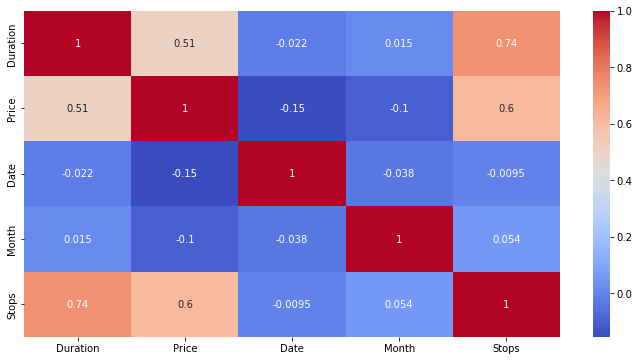

In [389]:
plt.figure(figsize = (12 , 6))
sns.heatmap(df_train.corr() , annot = True , cmap = "coolwarm")

### ----- X ----- X ----- X ----- X ----- X ----- X ----- X ----- X -----
# Now, we have to convert the categorical features into machine-friendly format, ie, numeric form. Ergo, Encoding is the way to go...

In [390]:
# Dropping the predictor variable for now
data = df_train.drop(['Price'], axis = 1)

In [391]:
train_categorical_data = data.select_dtypes(exclude = ['int64', 'float', 'int32'])
train_categorical_data.head()

,Airline,Source,Destination,Additional_Info
0,IndiGo,Banglore,New Delhi,No info
1,Air India,Kolkata,Banglore,No info
2,Jet Airways,Delhi,Cochin,No info
3,IndiGo,Kolkata,Banglore,No info
4,IndiGo,Banglore,New Delhi,No info


In [392]:
train_numerical_data = data.select_dtypes(include = ['int64', 'float', 'int32'])
train_numerical_data.head()

,Duration,Date,Month,Stops
0,170,24,3,0
1,445,1,5,2
2,1140,9,6,2
3,325,12,5,1
4,285,1,3,1


In [393]:
# importing all the necessary libraries
from sklearn.preprocessing import LabelEncoder

# making an object of the LabelEncoder class
le = LabelEncoder()

train_categorical_data = train_categorical_data.apply(LabelEncoder().fit_transform)
train_categorical_data.head()

,Airline,Source,Destination,Additional_Info
0,3,0,5,8
1,1,3,0,8
2,4,2,1,8
3,3,3,0,8
4,3,0,5,8


In [394]:
# Now we may want to concatenate all the numerical, categorical (after encoding), and the target features
train = pd.concat([train_categorical_data, train_numerical_data, df_train['Price']], axis=1)
train.head()

,Airline,Source,Destination,Additional_Info,Duration,Date,Month,Stops,Price
0,3,0,5,8,170,24,3,0,3897
1,1,3,0,8,445,1,5,2,7662
2,4,2,1,8,1140,9,6,2,13882
3,3,3,0,8,325,12,5,1,6218
4,3,0,5,8,285,1,3,1,13302


<AxesSubplot:>

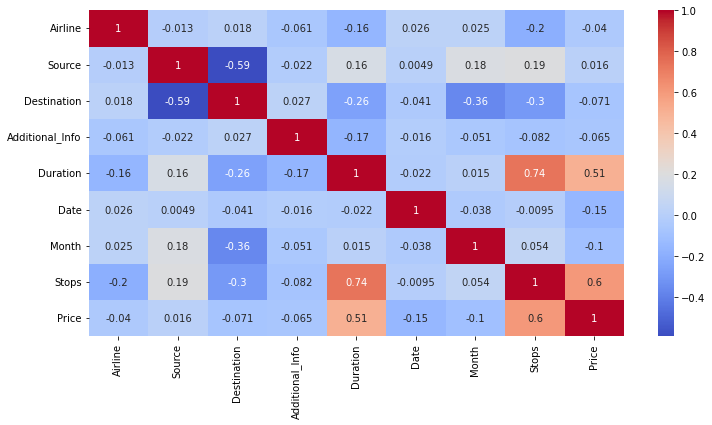

In [395]:
# Creating a heatmap
plt.figure(figsize = (12 , 6))
sns.heatmap(train.corr() , annot = True , cmap = "coolwarm")

/tmp/ipykernel_69389/4268454167.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(train.corr(), dtype=np.bool))


Text(0.5, 1.0, 'Heat Map')

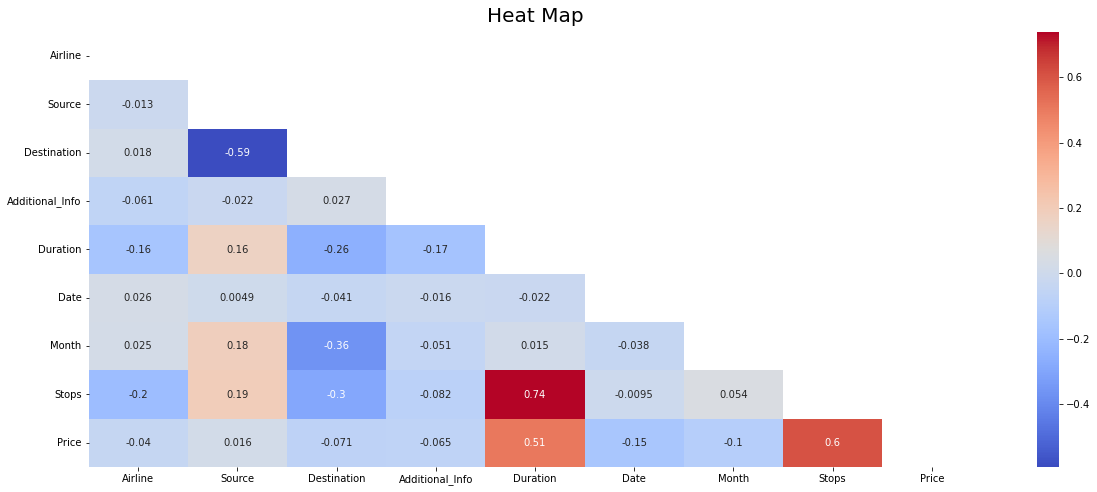

In [396]:
# you would not lose any information if you cut down one part of the heatmap along the diagonal
'''Let’s use the np.triu() numpy function to isolate the upper triangle 
of a matrix while turning all the values in the lower triangle into 0. (
The np.tril() function would do the same, only for the lower triangle.) 
Using the np.ones_like() function will change all the isolated values into 1.
'''
mask = np.triu(np.ones_like(train.corr(), dtype=np.bool))

plt.figure(figsize=(20, 8))

heatmap = sns.heatmap(train.corr(), cmap = 'coolwarm', annot = True, mask = mask)
heatmap.set_title('Heat Map', fontsize = 20, pad = 10)

## The following code returns the correlation of all features with 'Price', a single, dependent variable, sorted by 'Price' in a descending manner.

In [397]:
correlation = train.corr()[['Price']].sort_values(by='Price', ascending=False)
correlation

,Price
Price,1.000000
Stops,0.603897
Duration,0.506604
Source,0.015999
Airline,-0.039565
Additional_Info,-0.065463
Destination,-0.071122
Month,-0.103643
Date,-0.153774


Text(0.5, 1.0, 'Correlation of independent variables with the dependent variable')

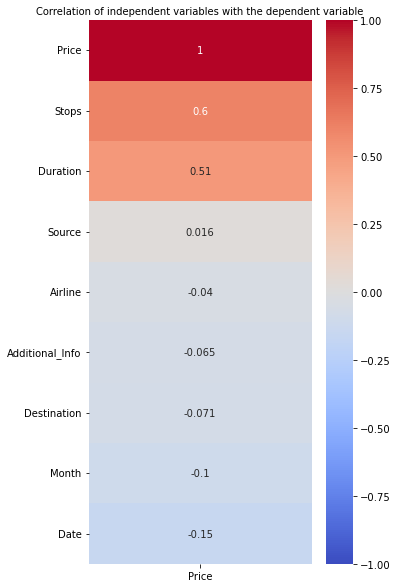

In [398]:
# to represent the same thing using the heatmap
plt.figure(figsize = (5, 10))
heatmap = sns.heatmap(correlation, cmap = 'coolwarm', vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Correlation of independent variables with the dependent variable', fontsize = 10)

### <b>Insight:</b> <i>These are the features which influence the price of an airline ticket. We will select those features whose absolute values are close to 1 as our predictor variables. Those features are: 'Stops', 'Duration', 'Month', and 'Date'.</i><br><br>

# Now, that the basic cleaning, EDA, and Feature Engineering is done on the training data, the same must be done on the test data.

In [399]:
# Date_of_Journey
df_test['Date'] = df_test['Date_of_Journey'].str.split('/').str[0]
df_test['Month'] = df_test['Date_of_Journey'].str.split('/').str[1]
df_test['Year'] = df_test['Date_of_Journey'].str.split('/').str[2]

# Now convert them into int type
df_test['Date'] = df_test['Date'].astype(int)
df_test['Month'] = df_test['Month'].astype(int)
df_test['Year'] = df_test['Year'].astype(int)

In [400]:
# Duration
df_test["Duration"] = df_test["Duration"].apply(convert_duration)

In [401]:
# Stops

# formatting the stops
df_test["Stops"] = df_test["Total_Stops"].str.split(" ").str[0]
df_test["Stops"].replace("non-stop" , 0 , inplace = True)

# Converting the stops dtype to int
df_test['Stops'] = df_test["Stops"].astype(int)

In [402]:
# Dropping those categorical features which are used to create new features (Feature Engineering),
# or just have too many values to Encoded
df_test.drop(['Date_of_Journey', 'Total_Stops', 'Year', 'Route', 'Dep_Time', 'Arrival_Time'], axis = 1, inplace = True)
df_test.head()

,Airline,Source,Destination,Duration,Additional_Info,Date,Month,Stops
0,Jet Airways,Delhi,Cochin,655,No info,6,6,1
1,IndiGo,Kolkata,Banglore,240,No info,12,5,1
2,Jet Airways,Delhi,Cochin,1425,In-flight meal not included,21,5,1
3,Multiple carriers,Delhi,Cochin,780,No info,21,5,1
4,Air Asia,Banglore,Delhi,170,No info,24,6,0


### Doing some encoding on the categorical features to make it machine-friendly.

In [403]:
test_categorical_data = df_test.select_dtypes(exclude=['int64', 'float','int32',])
test_categorical_data.head()

,Airline,Source,Destination,Additional_Info
0,Jet Airways,Delhi,Cochin,No info
1,IndiGo,Kolkata,Banglore,No info
2,Jet Airways,Delhi,Cochin,In-flight meal not included
3,Multiple carriers,Delhi,Cochin,No info
4,Air Asia,Banglore,Delhi,No info


In [404]:
test_numerical_data  = df_test.select_dtypes(include=['int64', 'float','int32'])
test_numerical_data.head()

,Duration,Date,Month,Stops
0,655,6,6,1
1,240,12,5,1
2,1425,21,5,1
3,780,21,5,1
4,170,24,6,0


### Here, it is in our interest to choose any form of encoding. We have chosen the LabelEncoder.

In [405]:
# LabelEncoding
test_categorical_data = test_categorical_data.apply(LabelEncoder().fit_transform)

In [406]:
# Viewing how the categorical training data looks like after the encoding is done.
test_categorical_data.head()

,Airline,Source,Destination,Additional_Info
0,4,2,1,5
1,3,3,0,5
2,4,2,1,3
3,6,2,1,5
4,0,0,2,5


In [407]:
test = pd.concat([test_categorical_data, test_numerical_data], axis=1)
test.head()

,Airline,Source,Destination,Additional_Info,Duration,Date,Month,Stops
0,4,2,1,5,655,6,6,1
1,3,3,0,5,240,12,5,1
2,4,2,1,3,1425,21,5,1
3,6,2,1,5,780,21,5,1
4,0,0,2,5,170,24,6,0


In [408]:
# Predictor Variables
X = train[['Stops', 'Duration', 'Month', 'Date']]
X.tail()

,Stops,Duration,Month,Date
10678,0,150,4,9
10679,0,155,4,27
10680,0,180,4,27
10681,0,160,3,1
10682,2,500,5,9


In [409]:
y = train['Price']
y.tail()

10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, dtype: int64

# Building the Machine Learning Model

In [410]:
from math import sqrt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [411]:
# training testing and splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [412]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print(50 *'*')
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (8545, 4)
The size of training output is (8545,)
**************************************************
The size of testing input is (2137, 4)
The size of testing output is (2137,)


# Linear Regression

In [413]:
#Applying standard scaler on the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit_transform(X_train)
scale.transform(X_test)

array([[ 1.73961414, -0.03213063,  0.25506567,  0.87218334],
       [ 0.25829846, -0.19986788,  1.11416547, -1.2506194 ],
       [ 0.25829846,  0.24414248,  0.25506567, -0.54301849],
       ...,
       [ 0.25829846,  0.45134731, -0.60403412,  0.87218334],
       [ 0.25829846,  0.73748732, -1.46313392,  1.22598379],
       [ 0.25829846, -0.48600789,  1.11416547, -0.89681895]])

In [414]:
#Importing the algorithm
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [415]:
#Fitting the model on training data
reg.fit(X_train, y_train)

LinearRegression()

In [416]:
#Checking the coefficient(slope) and intercepts
m = reg.coef_
c = reg.intercept_
m,c

(array([ 3.55486674e+03,  1.11777919e+00, -5.48869804e+02, -7.68605324e+01]),
 9053.559117337705)

In [417]:
# Testing the model

#Predicting the target: price against the predictors in the training data set
#Predicted data stored in y_pred_train
y_pred_train = reg.predict(X_train)

In [418]:
#Predicting the target: price against the predictors in the testing data set
#Predicted data stored in y_pred_test
y_pred_test = reg.predict(X_test)

In [419]:
# Evaluating the model

r2_S = r2_score(y_train, y_pred_train)
r2_S

0.4139353949999691

In [420]:
r2_S = r2_score(y_test, y_pred_test)
r2_S

0.41124570720365416

## Ridge Regressor

In [421]:
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor =GridSearchCV(Ridge(), params ,cv =5,scoring = 'neg_mean_absolute_error', n_jobs =-1)
ridge_regressor.fit(X_train ,y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [422]:
y_train_pred =ridge_regressor.predict(X_train) ##Predict train result
y_test_pred =ridge_regressor.predict(X_test) ##Predict test result

In [423]:
print("Train Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  3523.981887578189
Mean absolute % error:  31
R-squared:  0.4139353949999687


In [424]:
print("Test Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  3562.9697197351
Mean absolute % error:  31
R-squared:  0.411245707139543


## Decision Tree Regressor

In [425]:
depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [426]:
y_train_pred =tree.predict(X_train) ##Predict train result
y_test_pred =tree.predict(X_test) ##Predict test result

In [427]:
print("Train Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  2526.651507261247
Mean absolute % error:  21
R-squared:  0.6987210087485939


In [428]:
print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  2960.802490868837
Mean absolute % error:  22
R-squared:  0.5934362076537292


## Random Forest Regressor

In [429]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
random_regressor.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='neg_mean_absolute_error')

In [430]:
y_train_pred = random_regressor.predict(X_train)
y_test_pred = random_regressor.predict(X_test)

In [431]:
print("Train Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  2079.22678238037
Mean absolute % error:  17
R-squared:  0.7959757080363091


In [432]:
print("Test Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))


Test Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  2776.781586398168
Mean absolute % error:  21
R-squared:  0.6424034951657297


## XGBoost Regressor

In [433]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          monotone_constraints=None,
                                     

In [434]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [435]:
print("Train Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  2277.9850286628066
Mean absolute % error:  19
R-squared:  0.7551050164671681


In [436]:
print("Test Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  2580.2331381260447
Mean absolute % error:  20
R-squared:  0.6912352445891968


# Conclusion: Random Forest and XGBoost Regressors gives us the highest accuracy, albeit they are not impressively high.